<a href="https://colab.research.google.com/github/FelipeFerAl/TAM-2025-2/blob/main/ClassExercises/TAM110925.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_regression

N = 1000  #Samples
P = 20  #Features
x, y = make_regression(n_samples=N, n_features=P, noise=1, random_state=42)
print(x.shape, y.shape)

(1000, 20) (1000,)


In [2]:
import matplotlib.pyplot as plt
import numpy as np

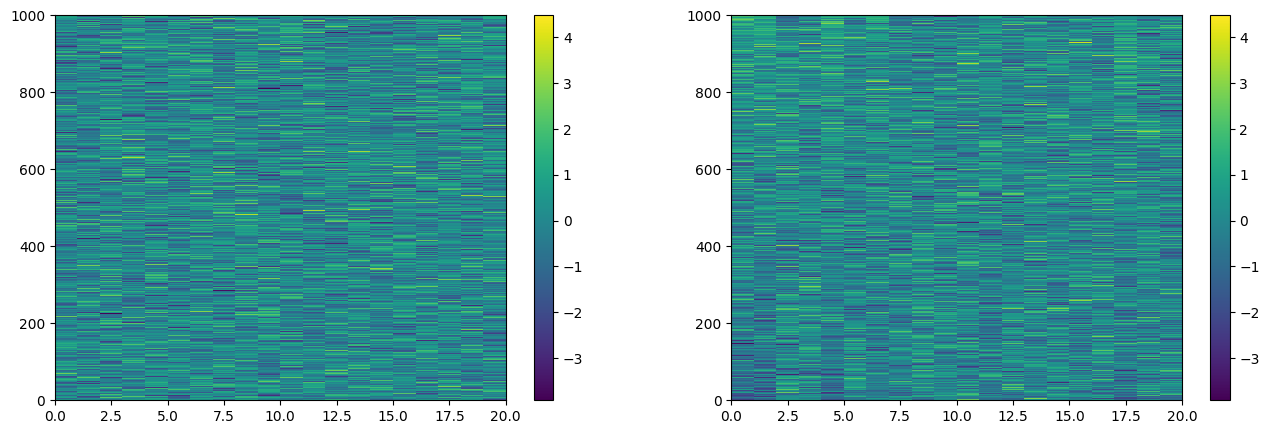

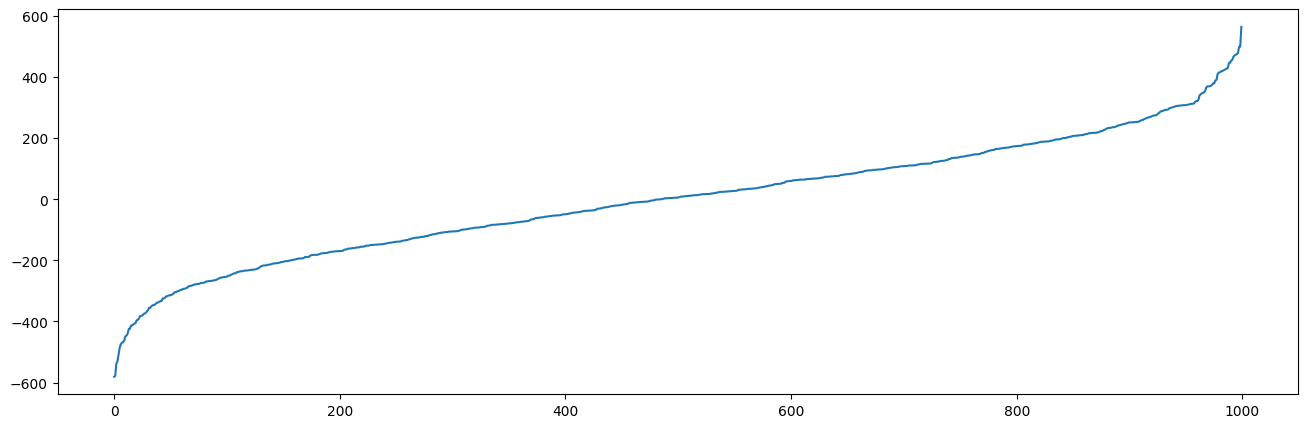

In [3]:
ind_ = np.argsort(y)
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.pcolormesh(x)
plt.colorbar()
plt.subplot(1,2,2)
plt.pcolormesh(x[ind_])
plt.colorbar()
plt.figure(figsize=(16,5))
plt.plot(np.sort(y))
plt.show()

<StemContainer object of 3 artists>

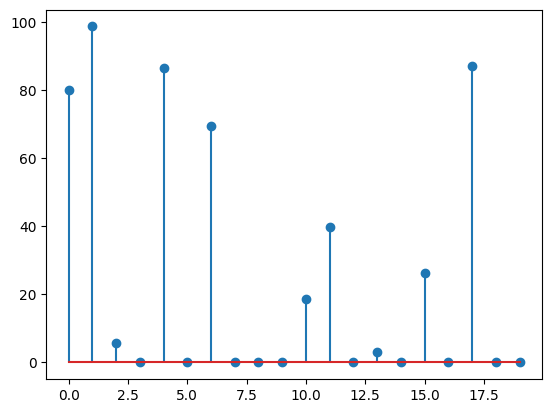

In [4]:
def mincua_reg(x, y, lamb_ = 1e-3):
  alpha = np.linalg.inv(x.T.dot(x)+lamb_*np.eye(x.shape[1])).dot(x.T).dot(y)
  return alpha

alpha = mincua_reg(x, y)
plt.stem(np.abs(alpha))

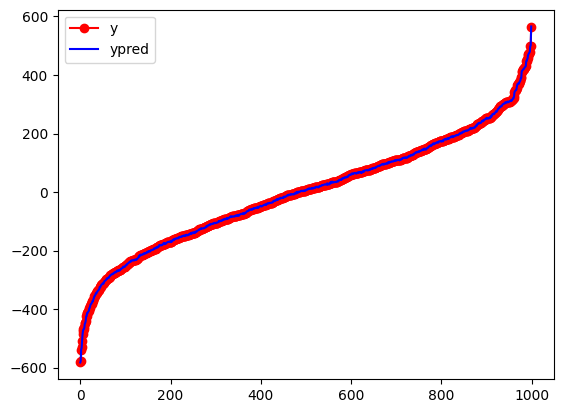

In [5]:
ypred = x.dot(alpha)

plt.plot(y[ind_], c='red', marker='o', label='y')
plt.plot(ypred[ind_], c='blue', label='ypred')
plt.legend()
plt.show()

In [6]:
from sklearn.datasets import fetch_california_housing

x2, y2 = fetch_california_housing(return_X_y=True)
print(x2.shape, y2.shape)

(20640, 8) (20640,)


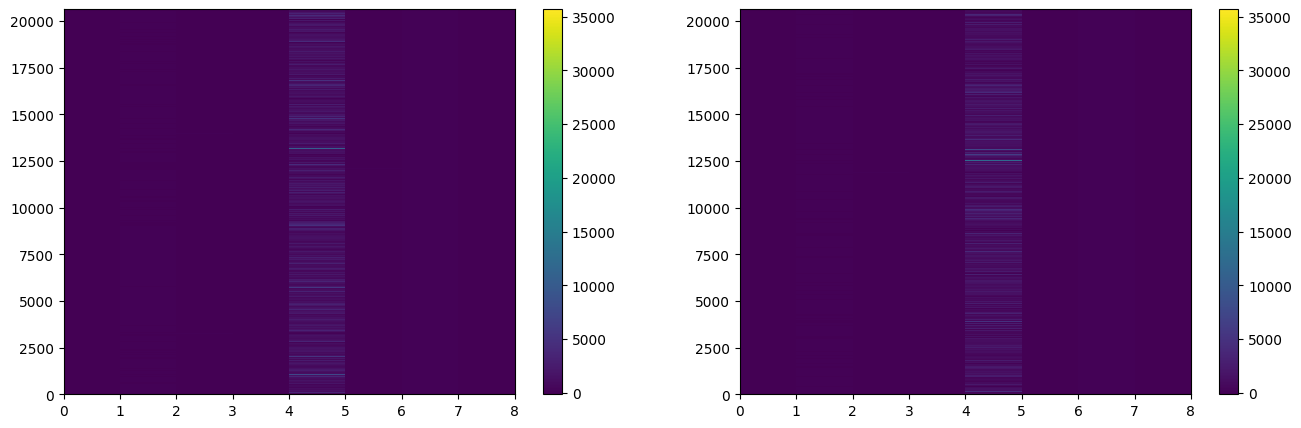

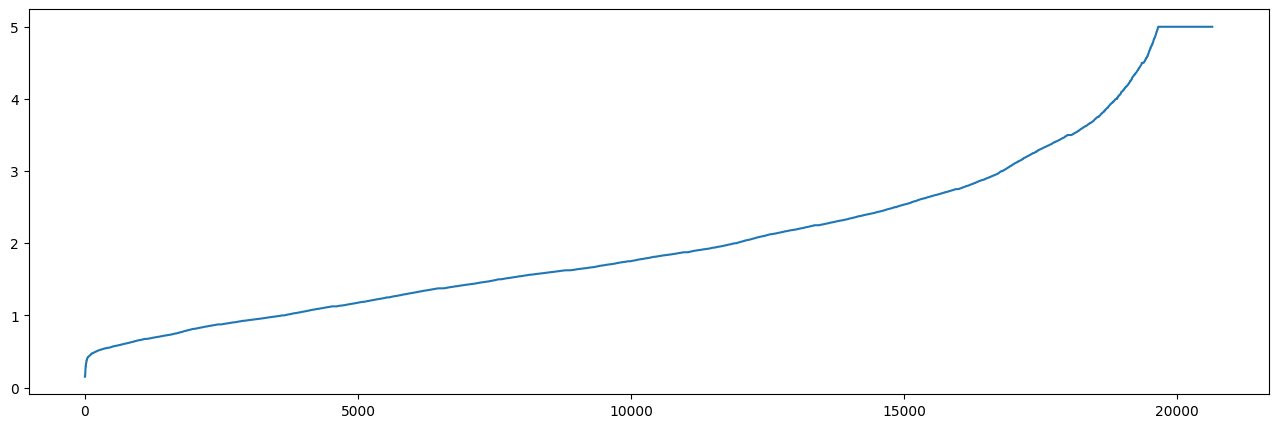

In [7]:
ind_2 = np.argsort(y2)
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.pcolormesh(x2)
plt.colorbar()
plt.subplot(1,2,2)
plt.pcolormesh(x2[ind_2])
plt.colorbar()
plt.figure(figsize=(16,5))
plt.plot(np.sort(y2))
plt.show()

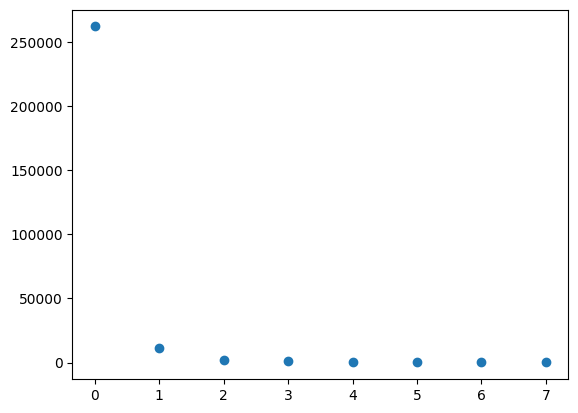

In [8]:
U, S, Vh = np.linalg.svd(x2)
plt.scatter(np.arange(len(S)), S)
plt.show()

#TAREA:
Repetir el ejercicio por inversa y por gradiente descendiente

##Analítico

<StemContainer object of 3 artists>

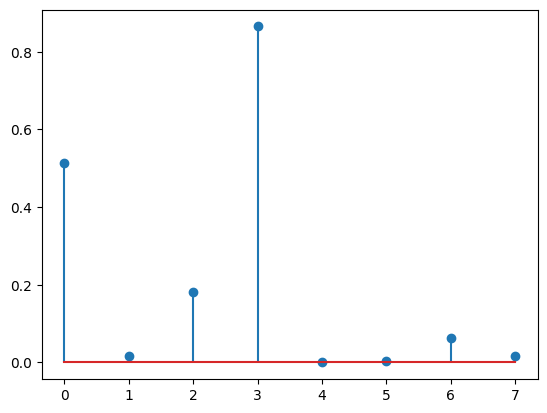

In [9]:
alpha2 = mincua_reg(x2, y2)
plt.stem(np.abs(alpha2))

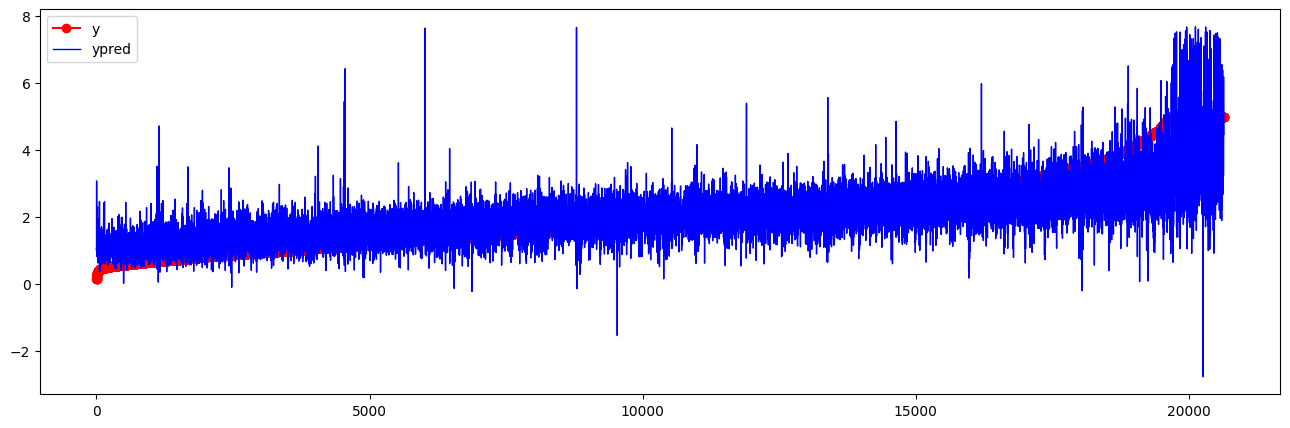

In [10]:
ypred2 = x2.dot(alpha2)

plt.figure(figsize=(16,5))
plt.plot(y2[ind_2], c='red', marker='o', label='y')
plt.plot(ypred2[ind_2], c='blue', label='ypred', linewidth=1)
plt.legend()
plt.show()

##Gradiente descendiente

In [47]:
def gradient_alphas(x, y, lr = 0.001, num_iterations = 1000):
  iterative_alphas = np.zeros(x.shape[1])
  for i in range(num_iterations):
    gradient = x.T.dot(x.dot(iterative_alphas) - y)
    iterative_alphas = iterative_alphas - lr * gradient
  return iterative_alphas

g_alpha = gradient_alphas(x, y)
g2_alpha = gradient_alphas(x2, y2, lr = 1e-11, num_iterations = 10000)

Diferencia entre Alpha Analítico y Gradiente para regression: 0.00020283841301317758


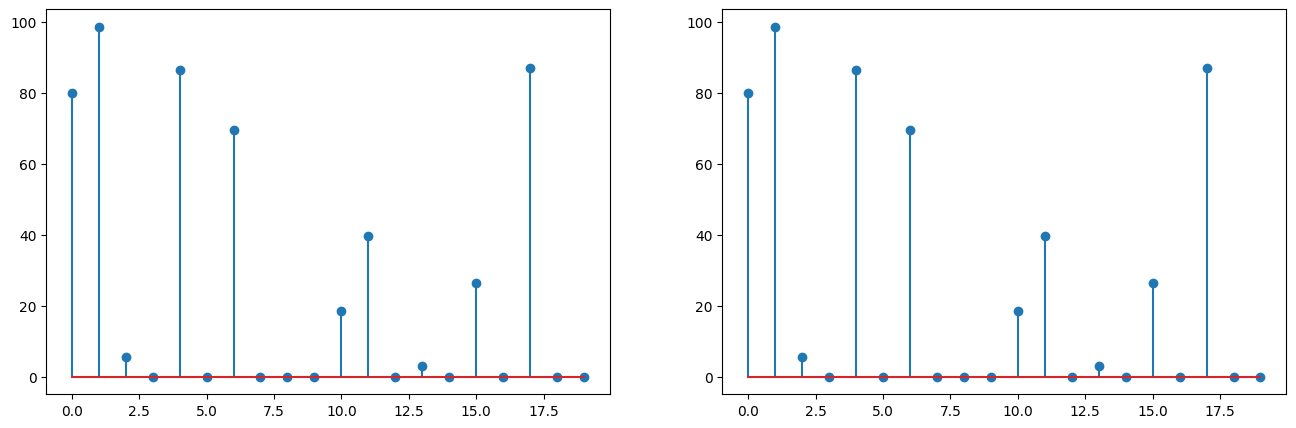

In [49]:
print(f"Diferencia entre Alpha Analítico y Gradiente para regression: {np.linalg.norm(alpha - g_alpha)}")
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.stem(np.abs(alpha))
plt.subplot(1,2,2)
plt.stem(np.abs(g_alpha))
plt.show()

Diferencia entre Alpha Analítico y Gradiente para regression california: 1.023150193353469


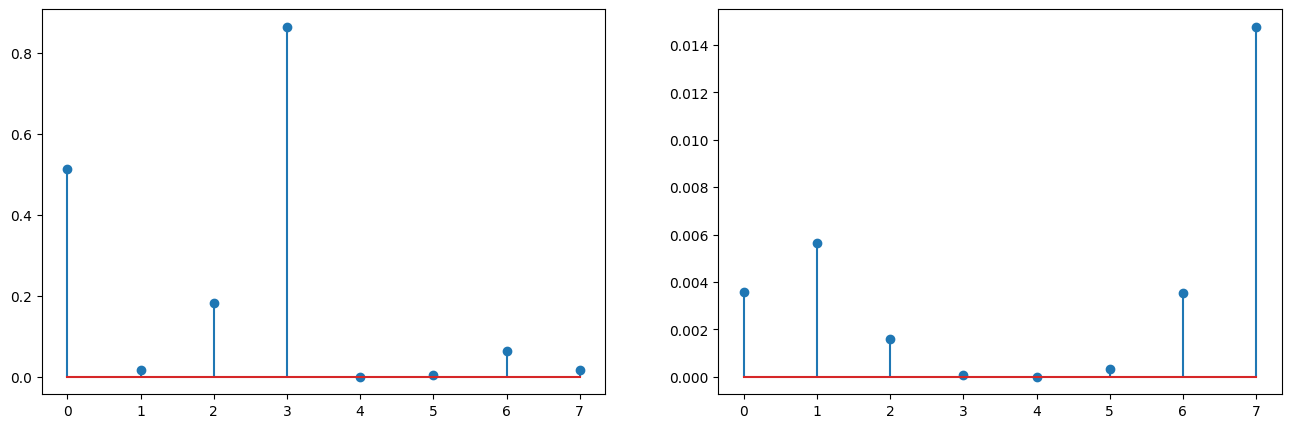

In [50]:
print(f"Diferencia entre Alpha Analítico y Gradiente para regression california: {np.linalg.norm(alpha2 - g2_alpha)}")
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.stem(np.abs(alpha2))
plt.subplot(1,2,2)
plt.stem(np.abs(g2_alpha))
plt.show()